In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
def set_style():
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20, "font.family": "serif", 
                "axes.titlesize":20,"axes.labelsize":20, "ytick.labelsize":20, 
                 "xtick.labelsize":22 , 'legend.fontsize':22, 'legend.title_fontsize': 18}, style="white")


In [15]:


def load_loss_vals(file):
    loss_vals = []
    with open(file+'/loss.txt','r') as loss_file:
        for line in loss_file:
            loss_vals.append(float(line[:-1]))
        
    return loss_vals




def get_loss_diff_auc(main_in_list, main_out_list, ref_in_list,ref_out_list):
    
    diff_in = [(s_m-s_ref) for s_m,s_ref in zip(main_in_list,ref_in_list)]
    diff_out = [(s_m-s_ref) for s_m,s_ref in zip(main_out_list,ref_out_list)]
    
    y_test_in = [1]*len(diff_in)
    y_test_out = [0]*len(diff_out)
    y_test = y_test_in + y_test_out

    y_test_np = np.array(y_test)

    diff_list = diff_in + diff_out
    diff_np = np.array(diff_list)

    max_diff = np.max(diff_np)
    min_diff = np.min(diff_np)

    diff_normalized = (max_diff -diff_np)/(max_diff-min_diff)

    fpr, tpr, thresholds = metrics.roc_curve(y_test_np, diff_normalized)
    #print(y_test_np)
    
    return  diff_in,diff_out, fpr, tpr, thresholds
    
    


def get_loss_avg_auc(main_in_list, main_out_list):
    

    y_test_in = [1]*len(main_in_list)
    y_test_out = [0]*len(main_out_list)
    y_test = y_test_in + y_test_out

    y_test_np = np.array(y_test)

    diff_list = main_in_list + main_out_list
    diff_np = np.array(diff_list)

    max_diff = np.max(diff_np)
    min_diff = np.min(diff_np)

    diff_normalized = (max_diff -diff_np)/(max_diff-min_diff)

    fpr, tpr, thresholds = metrics.roc_curve(y_test_np, diff_normalized)
    #print(auc, '    ',len(main_in_list),'   ',len(main_out_list))

    return  fpr, tpr, thresholds



def get_threshold_precision_diff_tail_acc(main_in_list, main_out_list, ref_in_list,ref_out_list,population_out_list=None, population_in_list=None):
    
    
    diff_in = [(s_m-s_ref) for s_m,s_ref in zip(main_in_list,ref_in_list)]
    diff_out = [(s_m-s_ref) for s_m,s_ref in zip(main_out_list,ref_out_list)]
    
    
    
        
    
    if population_in_list is not None and population_out_list is not None:
        diff_population = [(s_m-s_ref) for s_m,s_ref in zip(population_in_list,population_out_list)]
        diff_population.sort(reverse=True)    
        threshold = diff_population[int(len(diff_population)*0.9)+1]#-150
        population_in_list.sort(reverse=True)
        threshold_pop = population_in_list[int(len(population_in_list)*0.9)+1]#-150
    else:
        diff_out.sort(reverse=True)
        threshold = diff_out[int(len(diff_out)*0.99)+1]#-150
        main_out_list.sort(reverse=True)
        threshold_pop=  main_out_list[int(len(main_out_list)*0.99)+1]#-150
        
    
        
    corr_in = lambda a,th : sum([1 for sample in a if sample<th ])
    

    cnt_corr_in = corr_in(diff_in,threshold)
    cnt_corr_in_pop = corr_in(main_in_list,threshold_pop)
    cnt_wrong_out = corr_in(diff_out, threshold)
    cnt_wrong_out_pop=corr_in(main_out_list,threshold_pop)

    #print(cnt_corr_in,cnt_wrong_out)
    #precision, accuracy, threshold, 
    print(cnt_corr_in,cnt_wrong_out/len(main_out_list),cnt_corr_in_pop,cnt_wrong_out_pop/len(main_out_list),cnt_corr_in/cnt_corr_in_pop)
    
    return threshold, threshold_pop



def get_threshold_precision_avg_acc(main_in_list, main_out_list, training_in_list=None, training_out_list=None):
    
    
    if training_in_list is not None and training_out_list is not None: 
        threshold = sum(training_in_list)/len(training_in_list)
    else:    
        threshold = sum(main_in_list)/len(main_in_list)
        #print("th",threshold)
    corr_in = lambda a,th : sum([1 for sample in a if sample<th ])

    cnt_corr_in = corr_in(main_in_list,threshold)
    cnt_wrong_out = corr_in(main_out_list, threshold)

    #print(cnt_corr_in,cnt_wrong_out)
    #precision, accuracy, threshold, 
    print(cnt_corr_in,cnt_wrong_out/len(main_out_list))
    return threshold




In [16]:
root_path = '../loss_values/'


path_1a_in = 'get_sentence_loss_file_samples_sub_id_long.csv_model_ClinicalBERT_1a_nsamples_1_date_29_12_2021_09_48_34'
path_1a_out = 'get_sentence_loss_file_out_samples_sub_id_long.csv_model_ClinicalBERT_1a_nsamples_1_date_29_12_2021_11_17_46'
#'get_sentence_loss_file_i2b2_samples_sub_id_long.csv_model_ClinicalBERT_1a_nsamples_1_date_29_12_2021_10_52_27'

path_temp_in ='get_sentence_loss_file_samples_sub_id_long.csv_model_pubmed_nsamples_1_date_29_12_2021_09_45_51'
path_temp_out = 'get_sentence_loss_file_out_samples_sub_id_long.csv_model_pubmed_nsamples_1_date_29_12_2021_11_58_20'
#'get_sentence_loss_file_i2b2_samples_sub_id_long.csv_model_pubmed_nsamples_1_date_29_12_2021_11_21_28'

clinicalbert_1a_in = load_loss_vals(root_path+'/'+path_1a_in)
clinicalbert_1a_out = load_loss_vals(root_path+'/'+path_1a_out)

template_1a_in = load_loss_vals(root_path+'/'+path_temp_in)
template_1a_out =  load_loss_vals(root_path+'/'+path_temp_out)

print(len(clinicalbert_1a_in),len(clinicalbert_1a_out),len(template_1a_in),len(template_1a_out))

13983 1718 13983 1718


In [17]:
diff_in,diff_out , fpr_diff, tpr_diff, thresh_diff= get_loss_diff_auc(clinicalbert_1a_in, clinicalbert_1a_out, template_1a_in,template_1a_out)
threshold,threshold_pop= get_threshold_precision_diff_tail_acc(clinicalbert_1a_in, clinicalbert_1a_out, template_1a_in,template_1a_out, population_in_list= None, population_out_list=None)
threshold_avg= get_threshold_precision_avg_acc(clinicalbert_1a_in, clinicalbert_1a_out)
fpr_loss, tpr_loss,thresh_loss =  get_loss_avg_auc(clinicalbert_1a_in, clinicalbert_1a_out)

8329 0.009313154831199068 161 0.009313154831199068 51.732919254658384
7769 0.3492433061699651


In [18]:

for loss,diff in zip(clinicalbert_1a_in,diff_in):
    if loss> threshold_avg and loss>threshold_pop and diff<threshold:
        chosen_loss = loss
        chosen_diff = diff
        print(loss,diff, threshold,threshold_pop,threshold_avg)
        break
    

3.1665475741028786 -3.3062893971800804 -2.2431820198893546 0.32475413557112914 1.6308790332870262


In [19]:
red_line_plot_1 = threshold_avg
orange_line = threshold_pop
green_line = threshold



plot 1:
#histogram: clinical_bert_1a_in, clinical_bert_1a_out
#line red: red_line_plot_1
#line orange: orange_line
#line blue: chosen_loss

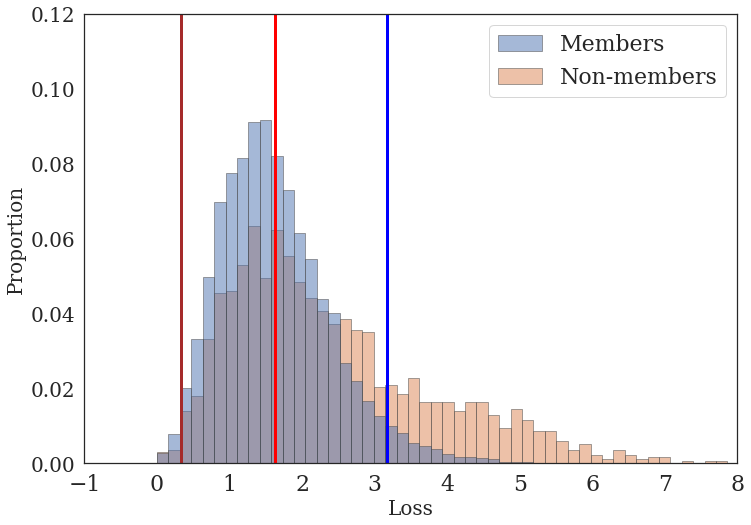

In [20]:

set_style()
df = pd.DataFrame(clinicalbert_1a_in, columns=["Loss"])
df ['membership'] = "Members"
df2 = pd.DataFrame(clinicalbert_1a_out, columns=["Loss"])
df2 ['membership'] = 'Non-members'
df = pd.concat([df, df2], ignore_index=True)
ax = sns.histplot(
    df,
    x="Loss", 
    hue = 'membership',
    # palette="light:m_r",
    stat = "proportion",
    edgecolor=".3",
    linewidth=.5,
    common_norm = False,
    bins=50
)
#ax.annotate(str("What"), 
 #           (1, 0.05), 
 #           xycoords='data',
 #           rotation=0, fontsize=12) 
ax.legend_.set_title(None)
plt.ylim(0,0.12)
plt.xlim(-1,8)
plt.axvline(red_line_plot_1, 0, 1, linewidth=3, color='red')
plt.axvline(orange_line, 0, 1,linewidth=3, color='brown')
plt.axvline(chosen_loss, 0, 1,linewidth=3, color='blue')
# plt.ylabel('Speedup \nover Shared', fontsize = 20)
plt.savefig("fig-loss.pdf", bbox_inches='tight')


plot 2:
#histogram: diff_in, diff_out
#line green: green_line
#line blue : chosen_diff

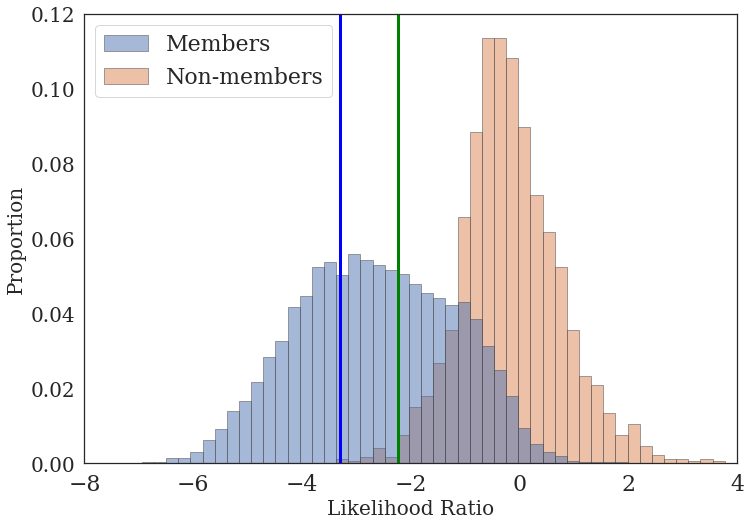

In [9]:

set_style()
df = pd.DataFrame(diff_in, columns=["Likelihood Ratio"])
df ['membership'] = "Members"
df2 = pd.DataFrame(diff_out, columns=["Likelihood Ratio"])
df2 ['membership'] = 'Non-members'
df = pd.concat([df, df2], ignore_index=True)
ax = sns.histplot(
    df,
    x="Likelihood Ratio", 
    hue = 'membership',
    # palette="light:m_r",
    stat = "proportion",
    edgecolor=".3",
    linewidth=.5,
    common_norm = False,
    bins=50

)

#ax.annotate(str("What"), 
 #           (1, 0.05), 
  #          xycoords='data',
   #         rotation=0, fontsize=12) 
ax.legend_.set_title(None)
plt.ylim(0, 0.12)
plt.xlim(-8,4)
plt.axvline(green_line, 0, 1,linewidth=3, color='green')
plt.axvline(chosen_diff, 0, 1,linewidth=3, color='blue')
# plt.axvline(chosen_loss, 0, 1, color='blue')
# plt.ylabel('Speedup \nover Shared', fontsize = 20)
plt.savefig("fig-diff.pdf", bbox_inches='tight')


In [10]:
threshold = 1
corr_in = lambda a,th : sum([1 for sample in a if sample<th ])

cnt_corr_in = corr_in(clinicalbert_1a_in,threshold)
cnt_wrong_out = corr_in(clinicalbert_1a_out, threshold)

print(cnt_corr_in,cnt_wrong_out)
print( cnt_corr_in/(cnt_corr_in+cnt_wrong_out), (cnt_corr_in+len(clinicalbert_1a_out)-cnt_wrong_out)/(len(clinicalbert_1a_out)+len(clinicalbert_1a_in)))


2938 228
0.9279848389134555 0.282020253487039


# ROC Plots

     True Positive Rate  False Positive Rate                  method
0              0.000000             0.000000  Ours (Liklihood ratio)
1              0.466924             0.002328  Ours (Liklihood ratio)
2              0.523493             0.005821  Ours (Liklihood ratio)
3              0.567904             0.008731  Ours (Liklihood ratio)
4              0.610456             0.011641  Ours (Liklihood ratio)
..                  ...                  ...                     ...
456            0.998141             0.909197   Baseline (Model loss)
457            0.998641             0.916182   Baseline (Model loss)
458            0.999070             0.922584   Baseline (Model loss)
459            0.999428             0.934808   Baseline (Model loss)
460            0.999785             0.967404   Baseline (Model loss)

[461 rows x 3 columns]


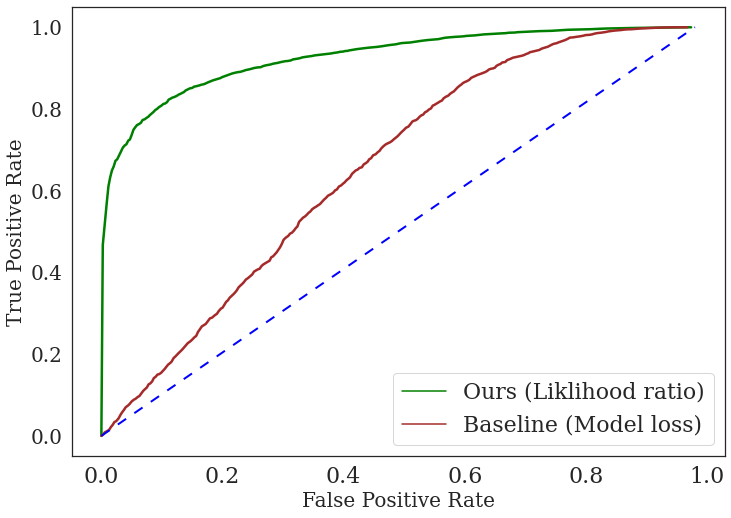

In [12]:
set_style()
df = pd.DataFrame(columns=["True Positive Rate", "False Positive Rate", "method"])
df ['True Positive Rate'] = tpr_diff[0::10]
df ['False Positive Rate'] = fpr_diff[::10]
df ['method'] = 'Ours (Liklihood ratio)'

df2 = pd.DataFrame(columns=["True Positive Rate", "False Positive Rate", "method"])
df2 ['True Positive Rate'] = tpr_loss[::10]
df2 ['False Positive Rate'] = fpr_loss[::10]
df2 ['method'] = 'Baseline (Model loss)'

df = pd.concat([df, df2], ignore_index=True)
print (df) 
ax = sns.lineplot(data=df, y='True Positive Rate', x='False Positive Rate', hue='method', linewidth=2.5, palette=sns.color_palette(['green', 'brown']))
ax.legend_.set_title(None)
plt.plot([0,0.98], [0,1], linestyle=(0, (5, 5)), linewidth=2,color='blue')

plt.savefig("ROC-curve.pdf", bbox_inches='tight')
# plt.fill_between( fpr_diff, tpr_diff)

     True Positive Rate  False Positive Rate                  method
0              0.000000             0.000000  Ours (Liklihood ratio)
1              0.466924             0.002328  Ours (Liklihood ratio)
2              0.523493             0.005821  Ours (Liklihood ratio)
3              0.567904             0.008731  Ours (Liklihood ratio)
4              0.610456             0.011641  Ours (Liklihood ratio)
..                  ...                  ...                     ...
456            0.998141             0.909197   Baseline (Model loss)
457            0.998641             0.916182   Baseline (Model loss)
458            0.999070             0.922584   Baseline (Model loss)
459            0.999428             0.934808   Baseline (Model loss)
460            0.999785             0.967404   Baseline (Model loss)

[461 rows x 3 columns]


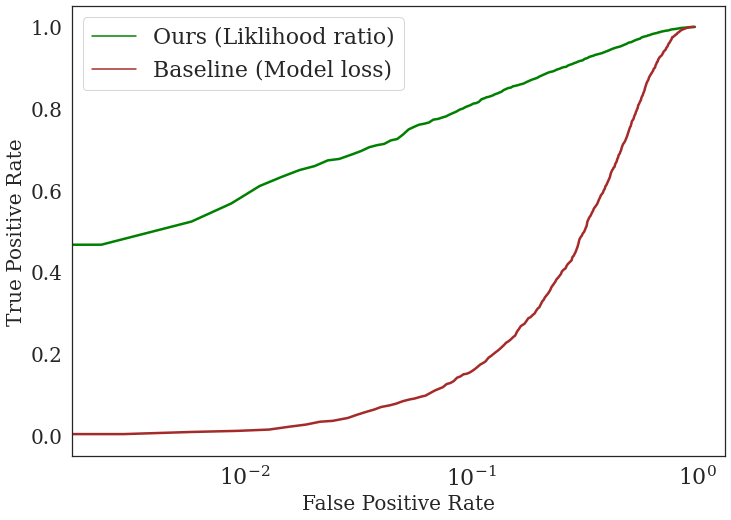

In [13]:
set_style()
df = pd.DataFrame(columns=["True Positive Rate", "False Positive Rate", "method"])
df ['True Positive Rate'] = tpr_diff[0::10]
df ['False Positive Rate'] = fpr_diff[::10]
df ['method'] = 'Ours (Liklihood ratio)'

df2 = pd.DataFrame(columns=["True Positive Rate", "False Positive Rate", "method"])
df2 ['True Positive Rate'] = tpr_loss[::10]
df2 ['False Positive Rate'] = fpr_loss[::10]
df2 ['method'] = 'Baseline (Model loss)'

df = pd.concat([df, df2], ignore_index=True)
print (df) 
ax = sns.lineplot(data=df, y='True Positive Rate', x='False Positive Rate', hue='method', linewidth=2.5, palette=sns.color_palette(['green', 'brown']))
ax.legend_.set_title(None)

#plt.plot([1,0.5], [0,1], linestyle=(0, (5, 5)), linewidth=2,color='blue')
ax.set(xscale='log')

plt.savefig("ROC-curve.pdf", bbox_inches='tight')
# plt.fill_between( fpr_diff, tpr_diff)
#[0]
#[0]